In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score

In [79]:
# load the diabetes datasets
df = datasets.load_diabetes()
print (df.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [67]:
pd.DataFrame(df.data).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [69]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [68]:
pd.DataFrame(df.target).head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
import math

# x is data frame here y is a np array 
def MSE(x, y, model):
    predicts = model.predict(x)
    sse =[]
    for i in range(len(x)):
        sse.append(math.log10((y.iloc[i] - predicts[i]) ** 2))
    
    return sum(sse)/len(sse)

In [ ]:
def search_alpha(alphas):
    
    raw_mse = {}

    for j in alphas:

        MSE_list = []
        for i in range(5):
        # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
            x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
            lasso = linear_model.Lasso(alpha = j)
            lasso.fit(x_train, y_train)
            MSE_list.append(MSE(x_test, y_test, lasso))

            raw_mse[j] = MSE_list   

    return raw_mse

In [ ]:
alphas = list(np.arange(0.01, 1, 0.01) )
raw = search_alpha(alphas)

In [ ]:
mse = []
for i in raw.keys():
    mse.append(sum(raw[i])/len(raw[i]))
In [107]:
print (min(mse))

In [ ]:
# index starts from zero
mse.index(min(mse))

In [ ]:
list(raw.keys())[mse.index(min(mse))]


In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

In [ ]:
# prepare a range of alpha values to test
param_grid = {
#               "alpha":[0, 1, 0.1]
                "alpha": np.arange(0, 1, 0.01)
             }

# create and fit a lasso regression model, testing each alpha
lasso = Lasso()
# This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# or scoring must be passed.

#### would still want to use mean squared error instead of r^2
grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
grid.fit(dataset.data, dataset.target)
print(grid)


# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [51]:
# scoring against the alpha values 
import matplotlib.pyplot as plt
%matplotlib inline

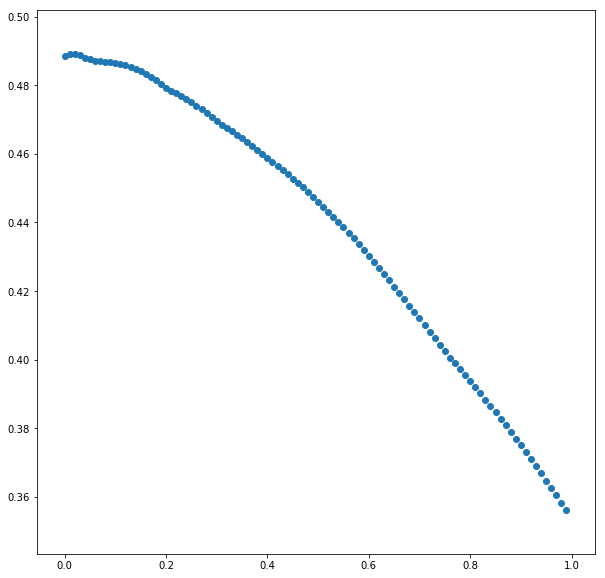

In [52]:
fig = plt.figure(figsize = (10, 10))

scores = grid.cv_results_['mean_test_score']
alphas = np.arange(0, 1, 0.01)
plt.scatter(alphas, scores)

plt.show()